In [4]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [5]:
words = open("/content/names.txt", 'r').read().splitlines()
len(words)

32033

In [8]:
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [6]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [10]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [9]:
#build dataset

block_size = 3
X, Y = [], []

for w in words[:5]:
  print(w)
  context = [0] * block_size

  for ch in w + '.':
    X.append(context)
    Y.append(stoi[ch])
    print(''.join(itos[i] for i in context), '--->', ch)
    context = context[1:] + [stoi[ch]]


emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [11]:
X = torch.tensor(X)
Y = torch.tensor(Y)

In [14]:
# we have 32 inputs for first 5 words; each of context window 3

X.shape, Y.shape

(torch.Size([32, 3]), torch.Size([32]))

In [24]:
#creating embeddings
#In the paper they try to fit 17000 words in 30 dimensional space

#We have only 27 chars; so 2 dimensional space works for us
C = torch.randn((27, 2))

#indexing inputs with embeddings
emb = C[X]

In [25]:
C[[0,1,2]] #.em

tensor([[-1.3771, -0.9212],
        [-1.0202,  0.2137],
        [ 0.0523,  0.9162]])

In [26]:
emb.shape

torch.Size([32, 3, 2])

In [27]:
#neurons

w1 = torch.randn((6, 100)) #100 neurons each with 6 weights
b1 = torch.randn(100)

In [36]:
emb @ w1 + b1

RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

In [37]:
w1.shape

torch.Size([6, 100])

In [ ]:
#emb => [32, 3, 2]
#w1 => [6, 100]

#need to unbind emb dimenstion to [32,6]

In [43]:
torch.cat([emb[:,0,:], emb[:,1,:], emb[:,2,:]], 1).shape #1 way but context size changes need to modify again

torch.Size([32, 6])

In [42]:
len(torch.unbind(emb,1)) # equivalent to emb[:,0,:], emb[:,1,:], emb[:,2,:]

3

In [44]:
torch.cat(torch.unbind(emb,1), 1).shape #2 more scalable; works for any context size #inefficient: creates additional memory

torch.Size([32, 6])

In [45]:
#to check whether both are same
torch.cat(torch.unbind(emb,1), 1) == torch.cat([emb[:,0,:], emb[:,1,:], emb[:,2,:]], 1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [46]:
#more efficient way #3

emb.view(32,6)

tensor([[-1.3771, -0.9212, -1.3771, -0.9212, -1.3771, -0.9212],
        [-1.3771, -0.9212, -1.3771, -0.9212, -0.1939, -1.0441],
        [-1.3771, -0.9212, -0.1939, -1.0441, -1.0235,  0.1122],
        [-0.1939, -1.0441, -1.0235,  0.1122, -1.0235,  0.1122],
        [-1.0235,  0.1122, -1.0235,  0.1122, -1.0202,  0.2137],
        [-1.3771, -0.9212, -1.3771, -0.9212, -1.3771, -0.9212],
        [-1.3771, -0.9212, -1.3771, -0.9212, -0.0159, -0.4523],
        [-1.3771, -0.9212, -0.0159, -0.4523,  1.6765, -0.3951],
        [-0.0159, -0.4523,  1.6765, -0.3951, -0.1148,  0.8473],
        [ 1.6765, -0.3951, -0.1148,  0.8473, -0.7418,  1.3312],
        [-0.1148,  0.8473, -0.7418,  1.3312, -0.1148,  0.8473],
        [-0.7418,  1.3312, -0.1148,  0.8473, -1.0202,  0.2137],
        [-1.3771, -0.9212, -1.3771, -0.9212, -1.3771, -0.9212],
        [-1.3771, -0.9212, -1.3771, -0.9212, -1.0202,  0.2137],
        [-1.3771, -0.9212, -1.0202,  0.2137, -0.7418,  1.3312],
        [-1.0202,  0.2137, -0.7418,  1.3

In [49]:
emb.view(32,6) == torch.cat(torch.unbind(emb,1), 1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [53]:
emb.view(-1,6).shape #giving -1, pytorch figures out it the dim

torch.Size([32, 6])

In [56]:
b1.shape

torch.Size([100])

In [ ]:
#emb => [32, 6]
#w1 =>  [6, 100]
#emb @ w1 + b => [32, 100] + [1, 100] #always verify broadcasting rules

In [65]:
#hidden layer 1

h = torch.tanh(emb.view(-1,6) @ w1 + b1)
h

tensor([[ 0.9583, -0.8144, -0.9977,  ...,  0.9811, -0.6774, -0.9651],
        [ 0.7711, -0.4615, -0.7764,  ...,  0.6992, -0.8257, -0.9681],
        [ 0.9804, -0.6771, -0.9958,  ..., -0.2496, -0.9933, -0.6171],
        ...,
        [ 0.8156,  0.8361, -0.0795,  ..., -0.9981,  0.4034, -0.3757],
        [ 0.7471,  0.2320, -0.7502,  ..., -0.9717, -0.9757,  0.9240],
        [ 0.0581, -0.3940, -0.9970,  ...,  0.9749, -0.6303,  0.6185]])

In [66]:
h.shape

torch.Size([32, 100])

In [67]:
#hidden layer 2

w2 = torch.randn((100,27));
b2 = torch.randn(27)

In [68]:
logits = h @ w2 + b2

In [69]:
count = logits.exp()
probs = count / count.sum(1, keepdims=True)

probs

tensor([[4.0631e-12, 5.6930e-10, 1.2949e-10, 4.3155e-10, 1.7230e-03, 6.3836e-11,
         7.7703e-09, 7.6147e-17, 1.7783e-05, 2.6310e-15, 1.1009e-11, 2.9776e-07,
         2.4294e-12, 6.4739e-10, 6.3057e-16, 6.6445e-07, 2.6670e-11, 9.9825e-01,
         3.9651e-06, 1.4497e-11, 2.2523e-07, 6.9681e-12, 1.1656e-06, 6.5057e-09,
         1.0205e-10, 2.0522e-07, 3.9292e-11],
        [1.5149e-13, 2.1533e-09, 6.6666e-11, 6.8366e-10, 1.8488e-06, 9.5198e-13,
         6.4019e-05, 5.1793e-16, 1.9848e-07, 9.6597e-13, 1.3035e-09, 5.6484e-06,
         3.3274e-15, 2.6442e-05, 2.0100e-16, 3.9841e-06, 8.4141e-12, 8.5980e-04,
         5.9344e-05, 3.5518e-10, 1.0479e-08, 2.4524e-06, 9.9509e-01, 6.6772e-11,
         1.2579e-13, 3.8835e-03, 2.4292e-12],
        [8.9328e-12, 7.6123e-07, 3.5315e-06, 2.6713e-06, 2.7227e-03, 8.4372e-13,
         1.2705e-08, 5.8817e-11, 6.5158e-03, 5.5155e-09, 2.3089e-07, 2.6405e-04,
         3.2434e-07, 2.1682e-08, 9.8378e-12, 7.5817e-06, 3.9549e-05, 9.8171e-01,
         1.5839e-

In [70]:
probs.shape

torch.Size([32, 27])

In [74]:
loss = -probs[torch.arange(32), Y].log().mean()
loss

tensor(17.4528)

# Complete Network


In [193]:
len(words)

32033

In [194]:
#build entire dataset

block_size = 3
X, Y = [], []

for w in words:
  # print(w)
  context = [0] * block_size

  for ch in w + '.':
    X.append(context)
    Y.append(stoi[ch])
    # print(''.join(itos[i] for i in context), '--->', ch)
    context = context[1:] + [stoi[ch]]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [195]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [196]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility

C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [197]:
sum(p.nelement() for p in parameters) # number of parameters in total

3481

In [198]:
for p in parameters:
  p.requires_grad = True

In [118]:
#Training on entire dataset - computationally heavy

for i in range(10):
  emb = C[X] #[228146, 3, 2] on entire dataset
  h = torch.tanh(emb.view(-1,6) @ W1 + b1)
  logits = h @ W2 + b2
  counts = logits.exp()
  loss = F.cross_entropy(logits, Y) #similar to negative log likelihood (nll) #much better
  print(loss.item())

  for p in parameters:
    p.grad = None
  loss.backward()

  for p in parameters:
    p.data += -0.1 * p.grad

8.329227447509766
8.144326210021973
7.966792106628418
7.796451091766357
7.633185863494873
7.476908206939697
7.327521800994873
7.1848859786987305
7.048791885375977
6.918952465057373


In [121]:
torch.randint(0, X.shape[0], (32,)) #choosing random 32 inputs from 228146

tensor([ 58341,  28771, 196340,  14263, 192251,  42614, 184124, 196248,  32601,
        190800,  30981,  19321, 147794,  79320, 100052, 220905, 166702,  20930,
         91953,  31507,  44100,  31708,  84525, 115819,  30467, 105714, 173881,
         93663,   8597,  40078, 188375, 172227])

In [160]:
#Batching

for i in range(10):
  #mini-batch of size 32
  ix = torch.randint(0, X.shape[0], (32,))

  #forward pass
  emb = C[X[ix]]  #[32, 3, 2]
  h = torch.tanh(emb.view(-1,6) @ W1 + b1)
  logits = h @ W2 + b2
  counts = logits.exp()
  loss = F.cross_entropy(logits, Y[ix]) #similar to negative log likelihood (nll) #much better
  print(loss.item())

  #backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  #update
  for p in parameters:
    p.data += -0.1 * p.grad

2.79913067817688
3.4975976943969727
3.4127683639526367
2.8413007259368896
3.0565145015716553
2.710803508758545
2.919243812561035
3.1997108459472656
2.4777839183807373
2.6560282707214355


In [161]:
torch.linspace(-1,1,10)

tensor([-1.0000, -0.7778, -0.5556, -0.3333, -0.1111,  0.1111,  0.3333,  0.5556,
         0.7778,  1.0000])

In [162]:
lre = torch.linspace(-3, 0, 5)
lrs = 10**lre #0.001 to 1

print(lre)
print(lrs)

tensor([-3.0000, -2.2500, -1.5000, -0.7500,  0.0000])
tensor([0.0010, 0.0056, 0.0316, 0.1778, 1.0000])


In [199]:
# Finding good learning rate

lre = torch.linspace(-3, 0, 1000) #learning rate exponentional
lrs = 10**lre  #range between 10^-3 to 10^0 = [0.001, 1]

In [200]:
lri = []
lossi = []

In [201]:
for i in range(1000):
  #mini-batch of size 32
  ix = torch.randint(0, X.shape[0], (32,))

  #forward pass
  emb = C[X[ix]]  #[32, 3, 2]
  h = torch.tanh(emb.view(-1,6) @ W1 + b1)
  logits = h @ W2 + b2
  counts = logits.exp()
  loss = F.cross_entropy(logits, Y[ix]) #similar to negative log likelihood (nll) #much better
  # print(loss.item())

  #backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  #update
  for p in parameters:
    p.data += -lrs[i] * p.grad

  #track stat
  lri.append(lre[i])
  lossi.append(loss.item())

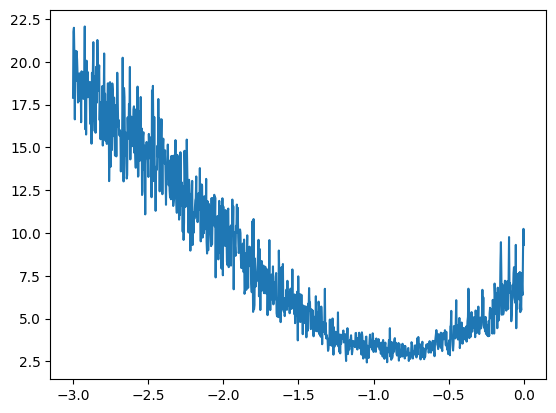

In [202]:
plt.plot(lri, lossi)

from the plot there is a sweet spot at 10^-1.0; lr = 0.01

In [203]:
for i in range(1000):
  #mini-batch of size 32
  ix = torch.randint(0, X.shape[0], (32,))

  #forward pass
  emb = C[X[ix]]  #[32, 3, 2]
  h = torch.tanh(emb.view(-1,6) @ W1 + b1)
  logits = h @ W2 + b2
  counts = logits.exp()
  loss = F.cross_entropy(logits, Y[ix]) #similar to negative log likelihood (nll) #much better
  # print(loss.item())

  #backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  #update
  lr = 0.1 #learning rate
  for p in parameters:
    p.data += -lr * p.grad

In [204]:
loss.item()

2.2939233779907227

# Splitting Datasets

In [7]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):
  X, Y = [], []
  for w in words:
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      context = context[1:] + [ix]

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1]) #80% #training
Xdev, Ydev = build_dataset(words[n1:n2]) #10% #development - fine tuning
Xte, Yte = build_dataset(words[n2:]) #10% #testing


torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [8]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility

C = torch.randn((27, 10), generator=g) #embedding dim : 10
W1 = torch.randn((30, 200), generator=g) #no. of neurons : 200
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [9]:
sum(p.nelement() for p in parameters) # number of parameters in total

11897

In [10]:
for p in parameters:
  p.requires_grad = True

In [11]:
lri = []
lossi = []
stepi = []

In [20]:
for i in range(50000):
  #mini-batch of size 32
  ix = torch.randint(0, Xtr.shape[0], (32,))

  #forward pass
  emb = C[Xtr[ix]]
  h = torch.tanh(emb.view(-1,30) @ W1 + b1)
  logits = h @ W2 + b2
  counts = logits.exp()
  loss = F.cross_entropy(logits, Ytr[ix]) #similar to negative log likelihood (nll) #much better
  # print(loss.item())

  #backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  #update
  lr = 0.01 #learning rate
  for p in parameters:
    p.data += -lr * p.grad

  #track stats
  #lri.append(lr)
  stepi.append(i)
  lossi.append(loss.log10().item())

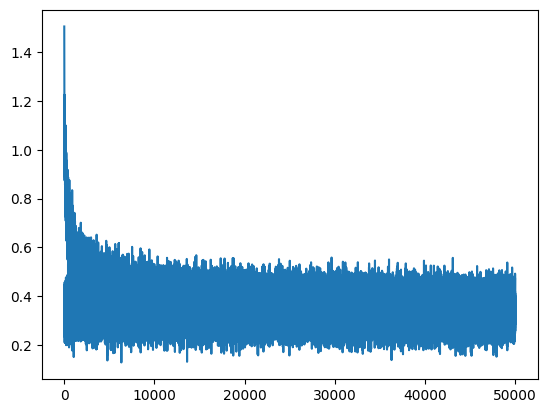

In [21]:
plt.plot(stepi, lossi)

In [22]:
#evaluating entire dataset

emb = C[Xtr]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2
counts = logits.exp()
loss = F.cross_entropy(logits, Ytr)
loss.item()

2.119410753250122

In [23]:
#evaluating dev dataset

emb = C[Xdev]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2
counts = logits.exp()
loss = F.cross_entropy(logits, Ydev)
loss.item()

2.158998966217041

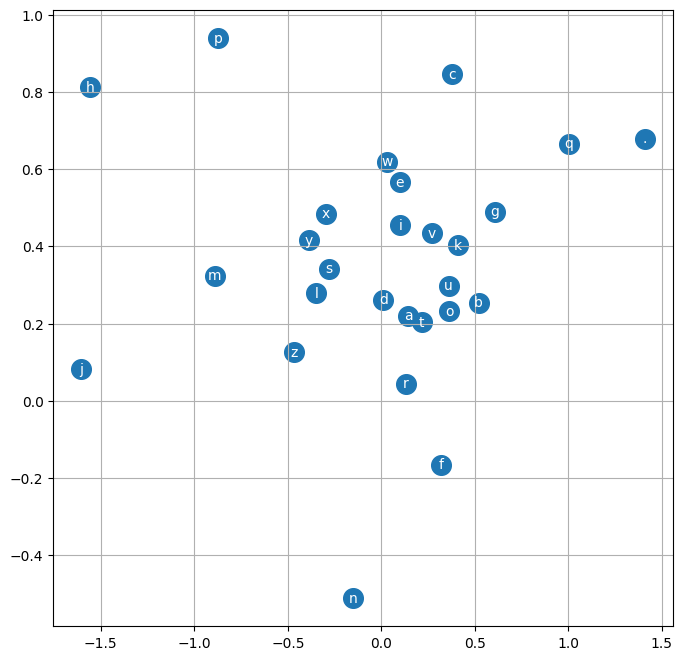

In [24]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

# Sampling

In [26]:
context = [0] * block_size
C[torch.tensor([context])]

tensor([[[ 1.4100,  0.6794,  0.4092, -0.8355,  0.2942, -0.1996, -0.9864,
           0.7518,  0.5582,  1.0820],
         [ 1.4100,  0.6794,  0.4092, -0.8355,  0.2942, -0.1996, -0.9864,
           0.7518,  0.5582,  1.0820],
         [ 1.4100,  0.6794,  0.4092, -0.8355,  0.2942, -0.1996, -0.9864,
           0.7518,  0.5582,  1.0820]]], grad_fn=<IndexBackward0>)

In [27]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):

    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break

    print(''.join(itos[i] for i in out))

mora.
kayah.
seen.
nihayla.
rethruthadrie.
caileed.
elin.
shi.
jen.
edelieanana.
selyn.
malaia.
nosalbergahiriel.
kendreelynn.
nophir.
ubuka.
dariyah.
faeh.
yule.
myskolanihia.
